In [165]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [166]:
df = pd.read_csv('2021.Vans_Aggregated.csv')
df.head()

,Manufacturer,Fuel Type,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%)
0,BMW AG,DIESEL,1,6.96,6.04,0.92,15.18,183.13,159.00,24.13,15.18,6.96,6.04,0.92,15.18,183.13,159.00,24.13,15.18
1,CHRYSLER,PETROL,5,8.29,6.59,1.69,25.68,188.77,150.20,38.57,25.68,8.05,6.59,1.46,22.20,183.33,150.03,33.31,22.20
2,PSA,PETROL,89,8.31,6.98,1.33,19.05,189.34,159.04,30.30,19.05,7.83,6.91,0.93,13.39,178.47,157.39,21.08,13.39
3,VOLVO,PETROL,31,8.98,7.24,1.75,24.14,204.63,164.84,39.80,24.14,8.51,7.24,1.27,17.59,193.97,164.95,29.02,17.59
4,OPEL AUTOMOBILE,DIESEL,6,5.34,4.83,0.52,10.73,140.63,127.00,13.63,10.73,5.15,4.62,0.53,11.52,135.53,121.52,14.01,11.52


In [148]:
df.isnull().sum()

Manufacturer                                         0
Fuel Type                                            0
Number of vehicles                                   0
OBFCM Fuel consumption (l/100 km)                    0
WLTP Fuel consumption (l/100 km)                     0
absolute gap Fuel consumption (l/100 km)             0
percentage gap Fuel consumption (%)                  0
OBFCM CO2 emissions (g/km)                           0
WLTP CO2 emissions (g/km)                            0
absolute gap CO2 emissions (g/km)                    0
percentage gap CO2 emissions (%)                     0
OBFCM Fuel consumption weighted (l/100 km)           0
WLTP Fuel consumption weighted (l/100 km)            0
absolute gap Fuel consumption weighted (l/100 km)    0
percentage gap Fuel consumption weighted (%)         0
OBFCM CO2 emissions weighted (g/km)                  0
WLTP CO2 emissions weighted (g/km)                   0
absolute gap CO2 emissions weighted (g/km)           0
percentage

In [149]:
def alterFuel(fuel):
    dist = {"DIESEL": 1,"PETROL": 2, "PETROL/ELECTRIC": 3}
    return dist[fuel]

In [150]:
df['Fuel Type'] =  df['Fuel Type'].apply(alterFuel)

In [151]:
df['Fuel Type']

0     1
1     2
2     2
3     2
4     1
5     1
6     1
7     2
8     3
9     3
10    1
11    1
12    1
13    2
14    3
15    2
16    2
17    2
18    2
19    1
20    1
21    2
22    2
23    2
24    2
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    2
35    2
36    3
37    2
38    2
39    3
Name: Fuel Type, dtype: int64

<Axes: xlabel='Fuel Type', ylabel='Count'>

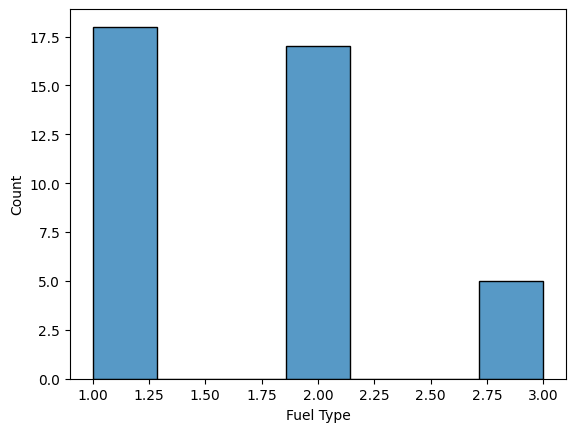

In [152]:
import seaborn as sns
sns.histplot(data = df, x = "Fuel Type")

In [153]:
X = np.array(df['Fuel Type'])
X = X.reshape(-1, 1)
X

array([[1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [3],
       [3],
       [1],
       [1],
       [1],
       [2],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [3],
       [2],
       [2],
       [3]], dtype=int64)

In [154]:
y = df['percentage gap CO2 emissions (%)']
y

0      15.18
1      25.68
2      19.05
3      24.14
4      10.73
5      15.87
6       7.00
7      28.88
8     375.84
9      48.51
10     13.38
11     17.66
12     11.81
13      5.05
14    187.38
15     12.80
16     19.98
17     39.49
18     23.22
19     23.04
20     17.40
21     41.64
22     36.57
23     -5.35
24     12.65
25     14.98
26     40.19
27     15.61
28     32.32
29     17.08
30      5.76
31     14.69
32     13.37
33     13.67
34     27.81
35     25.43
36    287.69
37     20.40
38     31.59
39    176.34
Name: percentage gap CO2 emissions (%), dtype: float64

In [155]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.4, random_state= 42)

In [156]:
modelo = LinearRegression()

In [157]:
modelo.fit(X_treino, y_treino)

LinearRegression()

In [158]:
score = modelo.score(X_teste, y_teste)
print(f'Coeficiente R^2: {score:.2f}')

Coeficiente R^2: 0.38


In [163]:
horsepower = np.array([[2]])


price = modelo.predict(horsepower)

print(f"Se você procurar um pontencia de {horsepower}  {price}")

Se você procurar um pontencia de [[2]] o preço é [61.53589286]
